## Assignment 1

### Describe the purpose of the data set you selected:


I used the diabetes data set from UCI machine learning repository.  It has 101,766 patient records, with 55 attributes.  The data was collected from 130 hospitals between the years 1999 to 2008 for regular, non-intensive-care-unit hospital admissions.  The records reflect the clinical data collected during a patient's hospital stay, pertinent to the treatment of diabetes.  (Since my wife has diabetes, I was interested in the type of data collected).

The purpose of the data set was to determine which characteristics of the patient and care they received had the most bearing on long-term health, which was determined by whether or not the patient was readmitted to the hospital within 30 days or after 30 days.

A good prediction algorithm would establish a relationship or correlation between a specific attribute or group of attributes with the probability of readmission to the hospital.



### Data Understanding - Describe the meaning and type of data for each attribute in the data file

### Verify Data Quality

As mentioned above, there were many missing values for the A1C and glucose serum test results. For these I used the mean value or median value of the existing measurements for some calculations.  For other calculations I used only the patients for which data were provided.  The values for "race" had many missing values also, and I replaced these values with "Other".

The provided data description mentioned no duplicates.

All of the meaurements were put into nominal ranges, and therefore there were no outliers.  

In [4]:
!ls -all Data

total 47664
drwxr-xr-x@ 5 eclarson  staff       170 Feb  6  2015 .
drwxr-xr-x@ 6 eclarson  staff       204 Sep 10 10:35 ..
-rwxr-xr-x@ 1 eclarson  staff      2547 May 15  2014 IDs_mapping.csv
-rwxr-xr-x@ 1 eclarson  staff  19159383 May 15  2014 diabetic_data.csv
-rwxr-xr-x@ 1 eclarson  staff   5238567 Feb  2  2015 diabetic_data_trimmed.csv


In [1]:
import pandas as pd
df = pd.read_csv("Data/diabetic_data_trimmed.csv") #read in the csv file


In [2]:
# from the instructor: note that there are more compact syntax representations for this
# the "replace" function in pandas is very powerful
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html 

import numpy as np
import copy
df = df.replace(to_replace='?',value=np.nan) # replace '?' with NaN (not a number)
df = df.replace(to_replace="[0-10)",value=5) # convert age ranges to numeric ordinal
df = df.replace(to_replace="[10-20)",value=15)
df = df.replace(to_replace="[20-30)",value=25)
df = df.replace(to_replace="[30-40)",value=35)
df = df.replace(to_replace="[40-50)",value=45)
df = df.replace(to_replace="[50-60)",value=55)
df = df.replace(to_replace="[60-70)",value=65)
df = df.replace(to_replace="[70-80)",value=75)
df = df.replace(to_replace="[80-90)",value=85)
df = df.replace(to_replace="[90-100)",value=95)
df = df.replace(to_replace="[100-110)",value=105)
df = df.replace(to_replace='No',value=0) # convert boolean to numeric
df = df.replace(to_replace="Yes", value=1)
df = df.replace(to_replace='Ch',value=1) #convert med change to numeric
df = df.replace(to_replace='Steady',value=2)
df = df.replace(to_replace='Up',value=3)
df = df.replace(to_replace='Down',value=4)
df = df.replace(to_replace='NO',value=0) #convert readmission (what we are trying to calculate to numeric
df = df.replace(to_replace='<30',value=1)
df = df.replace(to_replace='>30',value=1)

#replace blood sugar measurement (max_glu_serum) with numeric values for analysis
df_serum = copy.deepcopy(df.max_glu_serum)
df_serum = df_serum.replace(to_replace='Norm',value=1.0) # normal is in the 80 to 130 range
df_serum = df_serum.replace(to_replace='>200',value=2.0) # use 2 (instead of 200) as a nominal value here
df_serum = df_serum.replace(to_replace='>300',value=3.0) # use 3 as a nominal value here
df_serum = df_serum.replace(to_replace='None',value=np.nan) # use not a number as an unknown value here, so we can identify it
#convert the nans to the mean value so the average doesn't change
df_serum = df_serum.replace(to_replace=np.nan, value=df_serum.mean())
df["serum"] = df_serum

# adjust the A1C measurements
df_a1c = copy.deepcopy(df.A1Cresult)
df_a1c = df_a1c.replace(to_replace='>7',value=7.5) # use 7.5 as a nominal value here
df_a1c = df_a1c.replace(to_replace='>8',value=8.5) # use 8.5 as a nominal value here
df_a1c = df_a1c.replace(to_replace='None', value=np.nan);
df_a1c = df_a1c.replace(to_replace='Norm', value=6.0);
# use the median for the "nan" values to keep the grouping for the bar charts
df_a1c = df_a1c.replace(to_replace=np.nan, value=df_a1c.median())
df["a1c"] = df_a1c

# make the sex numeric so we can see the percentage of males to females
df_sex = copy.deepcopy(df.gender)
df_sex = df_sex.replace(to_replace='Male',value=0) #convert sex to numeric
df_sex = df_sex.replace(to_replace='Female',value=1)
df_sex = df_sex.replace(to_replace='Unknown/Invalid',value=np.nan) # make unknown sex the average
df_sex = df_sex.replace(to_replace=np.nan, value=df_sex.mean())
df["sex"] = df_sex

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 13 columns):
race                99493 non-null object
gender              101766 non-null object
age                 101766 non-null int64
time_in_hospital    101766 non-null int64
max_glu_serum       101766 non-null object
A1Cresult           101766 non-null object
insulin             101766 non-null int64
change              101766 non-null int64
diabetesMed         101766 non-null int64
readmitted          101766 non-null int64
serum               101766 non-null float64
a1c                 101766 non-null float64
sex                 101766 non-null float64
dtypes: float64(3), int64(6), object(4)

,age,time_in_hospital,insulin,change,diabetesMed,readmitted,serum,a1c,sex
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,65.967022,4.395987,1.420101,0.461952,0.770031,0.460881,1.750655,7.507183,0.537602
std,15.940838,2.985108,1.455199,0.498553,0.420815,0.498470,0.186210,0.437048,0.498579
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000
25%,55.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.750655,7.500000,0.000000
50%,65.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.750655,7.500000,1.000000
75%,75.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.750655,7.500000,1.000000
max,95.000000,14.000000,4.000000,1.000000,1.000000,1.000000,3.000000,8.500000,1.000000


### Simple Statistics

The table above shows the simple statistics for the numeric values in the table.

We can see that the average patient was between 60 and 70 years old, spent slightly over 4 days in the hospital, was likely to have had no change in medication, was probably taking some type of diabetes medication, had a glucose serum level of about 175, had an A1C level of 7.5, and was slightly more likely to be female than male.

This matches the provided data description in that one would expect a higher than normal glucose serum level and A1C test result in a population of diabetics. A patient also had a 46% chance of being readmitted to the hospital. 

The counts show that all of the missing data have been replaced with the mean values of the provided data.  I also calculated some cross-field statistics as shown below.

In [7]:
#import the other packages
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)


In [8]:
# find the percentage of people who were readmitted
percentReadmitted = float(len(df[df.readmitted != 0]))/len(df) * 100
print percentReadmitted

46.088084429


The readmission percentage above matches the calculation from the data frame describe() function in the table.

In [9]:
# find the percentage of people who were readmitted if they had an A1C measurement greater than normal (6.0)
df_A1C = copy.deepcopy(df[df.a1c > 6.0])
a1cLen = len(df_A1C);
df_A1C = df_A1C[df_A1C.readmitted > 0]
percentBoth = float(len(df_A1C))/float(a1cLen) * 100
print percentBoth

46.3141688022


This number is the percentage of patients who were readmitted if they had an elevated A1C measurement.  It shows that a person with an elevated A1C measurement was only slightly more likely to be readmitted to the hospital than the average patient. (46.31% vs 46.09%) 

In [10]:
#find the percentage of people who were readmitted if they stayed in the hospital more than least one day
df_hospitalized = copy.deepcopy(df[df.time_in_hospital > 1.0])
hospLen = len(df_hospitalized)
df_hospitalized = df_hospitalized[df_hospitalized.readmitted > 0]
percentBoth = float(len(df_hospitalized))/float(hospLen) * 100
print percentBoth

47.1333287649


Here we see the percentage of patients eventually readmitted who had an initial hospital stay of more than one day.  A person with a longer hospital stay was slightly more likely to be readmitted than the average patient (47.13% vs 46.09%)

In [11]:
#find the percentage of people who were readmitted if they had an insulin change
df_change = copy.deepcopy(df[df.insulin > 1])
changeLen = len(df_change)
df_change = df_change[df_change.readmitted > 0]
percentBoth = float(len(df_change))/float(changeLen) * 100
print percentBoth


48.1713035324


Here we we see the percentage of patients eventually readmitted after their insulin dosage was changed.  |A person with an insulin change was about 2% more likely to be readmitted than the average patient (48.17% vs 46.09%)

In [12]:
#find the percentage of people who were readmitted if they had an A1C test at all
df_a1ctest = copy.deepcopy(df[df.A1Cresult != 'None'])
a1cLen = len(df_a1ctest)
df_a1ctest = df_a1ctest[df_a1ctest.readmitted > 0]
percentBoth = float(len(df_a1ctest))/float(a1cLen) * 100
print percentBoth


43.9299565166


If the hospital administered an A1C test on a patient, the patient was about 2% LESS likely to be readmitted than the average patient (43.92% vs 46.09%).  This is regardless of the test result (normal or elevated).  This is counterintuitive in that the act of running the test affected the result, not the measurement itself.  

One possible explanation for this (and I am guessing here) is that patients that had the test with an elevated result and were informed of the result may have taken better care of themselves after their first hospital stay.

Some cross tabulations of a few of the fields is enlightening


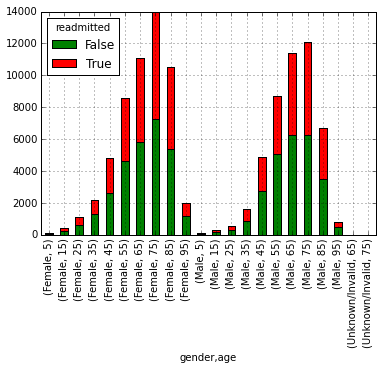

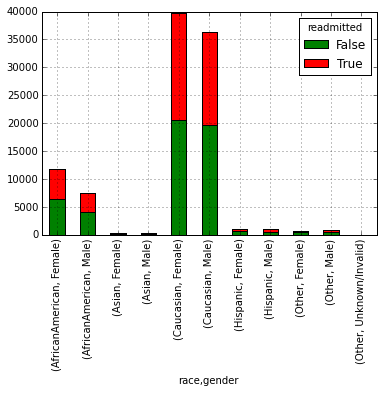

In [13]:
readmission_counts = pd.crosstab([df['gender'],df['age']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])

readmission_counts = pd.crosstab([df['race'],df['gender']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])

We can see from the above that the majority of patients were in the 65 to 80 age group, with very few very young patients.
Also, the majority were Caucasian with some African Americans.  There were comparatively few Hispanic and Asian patients.

### Data Visualization and Attribute Relationships

The following section shows bar charts and cross tabulations of the relationships between the different attributes and the readmission rates for each group of attributes.  The bar charts are very convenient in that they quickly show the differences between the readmission rates for each grouped attribute.

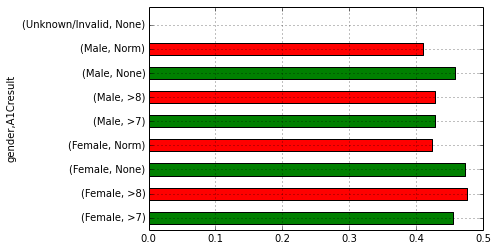

In [10]:
# print a bar chart of the people who were readmitted by A1Cresult
df_a1c = copy.deepcopy(df)
#replace the 2's with 1's so that the sum works out
df_a1c.readmitted = df_a1c.readmitted.replace(to_replace=2,value=1)
df_a1c = df_a1c.groupby(by=['gender','A1Cresult'])
readmission_rate = df_a1c.readmitted.sum() / df_a1c.readmitted.count()
readmission_rate.plot(kind='barh', stacked=True, color = ['green', 'red'])


This is a bar chart graphing A1C levels and gender against the likelihood of readmission to the hospital.  This chart reflects the counterintuitive result above in that a male with no A1C measurement was more likely to be readmitted than a male with an elevated A1C measurement.  And a female with no measurement at all was just about as likely to be readmitted as a female with an elevated A1C measurement.  The bar chart was chosen because it allows easy comparison between groups.  

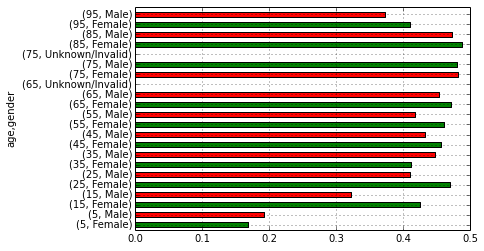

In [11]:
# print a bar chart of the people who were readmitted by age range and gender
df_ageGroup = copy.deepcopy(df)
#replace the 2's with 1's so that the sum works out
df_ageGroup.readmitted = df_ageGroup.readmitted.replace(to_replace=2,value=1)
df_ageGroup = df_ageGroup.groupby(by=['age','gender'])
readmission_rate = df_ageGroup.readmitted.sum() / df_ageGroup.readmitted.count()
readmission_rate.plot(kind='barh', stacked=True, color = ['green', 'red'])
                       

Bar chart of age and gender against the likelihood of readmission.

We can see here that the younger patients were, in general, less likely to be readmitted to the hospital than the older patients (with the exception of female patients in the 20 to 20 age group).  This would follow if older patients are in more fragile health and less resilient than younger patients. It is also interesting that patients older than 90 were less likely to be readmitted than the patients over 25.  This may be due to the fact that some of the very old patients passed away before they could be readmitted.  Again, the bar chart allows for easy comparison - the Female patients in the 15 year (10 to 20) and 25 year (20 to 30) were somewhat more likely to be readmitted than their male counterparts, but I have no explanation for this.

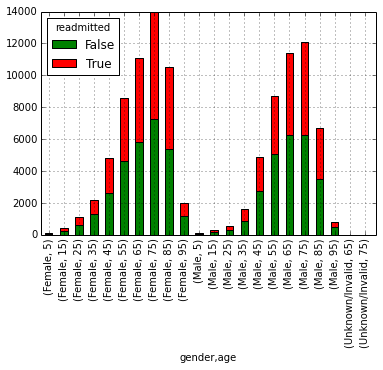

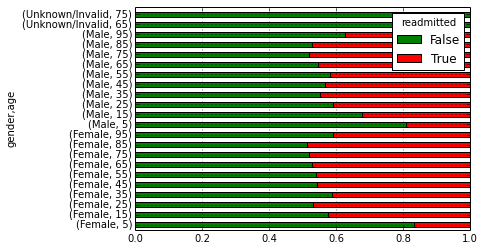

In [12]:
readmission_counts = pd.crosstab([df['gender'],df['age']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])

# divide the counts to get rates
readmission_rate = readmission_counts.div(readmission_counts.sum(1).astype(float),axis=0)
readmission_rate.plot(kind='barh', stacked=True, color=['green','red'])


The top chart is a repeat of the cross tabulation of the age and gender of the patients against the number of patients that were readmitted.  The cross tabulation shows actual patient counts, as opposed to the bottom chart which shows readmission rates.

The bottom chart is another version of the age/gender bar chart in the previous graph, but with the readmission rates on the same bar.  This is not as easy understand as the simpler bar chart above.

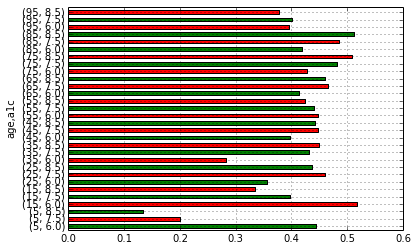

In [13]:
# print a bar chart of the people who were readmitted by age range and a1c level
df_ageGroup = copy.deepcopy(df)
#replace the 2's with 1's so that the sum works out
df_ageGroup.readmitted = df_ageGroup.readmitted.replace(to_replace=2,value=1)
df_ageGroup = df_ageGroup.groupby(by=['age','a1c'])
readmission_rate = df_ageGroup.readmitted.sum() / df_ageGroup.readmitted.count()
readmission_rate.plot(kind='barh', stacked=True, color = ['green', 'red'])


Bar chart of age and A1C level against the likelihood of readmission

We can see from the above chart that patients in the 70 to 89 age group were more likely to be readmitted if they had an elevated A1C level.  This also follows intuitively in that older patients are more fragile and an elevated A1C level indicates that they are not controlling their blood sugar levels.  Again, the bar charts allow for easy identification of outstanding attributes.

A cross tabulation of the above is shown in the next chart and it shows the number of patients in each group rather than the readmission rate.  The cross tabulation below shows what the simple statistics at the start of this page illustrate:  Most of the patients were in the 60 to 80 age group.  There were very few young patients, and most of the patients had A1C levels in the 7.0 to 8.0 range (of course most of the patients had no A1C measurement, but I imputed the remainder based on the median of the actual measurements).

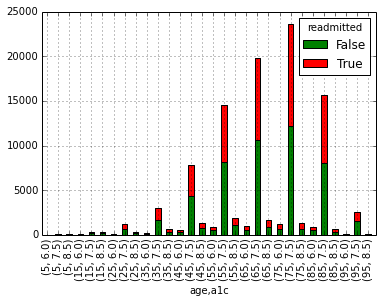

In [18]:
readmission_counts = pd.crosstab([df['age'],df['a1c']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])


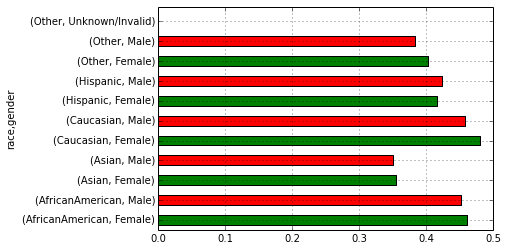

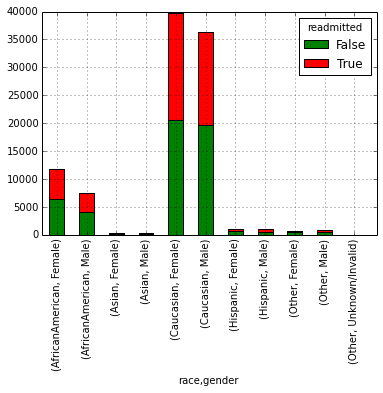

In [19]:
# print a bar chart of the people who were readmitted race and gender
df_raceGroup = copy.deepcopy(df)
#replace the 2's with 1's so that the sum works out
df_raceGroup.readmitted = df_raceGroup.readmitted.replace(to_replace=2,value=1)
df_raceGroup = df_raceGroup.groupby(by=['race','gender'])
readmission_rate = df_raceGroup.readmitted.sum() / df_raceGroup.readmitted.count()
readmission_rate.plot(kind='barh', stacked=True, color = ['green', 'red'])

readmission_counts = pd.crosstab([df['race'],df['gender']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])



Bar chart of ethnic group and gender vs likelihood of readmission

This bar chart shows that people of Asian descent were the least likely to be readmitted to the hospital, and that Caucasian females were most likely to be readmitted.  Caucasian males and African Americans of both sexes had about the same probability of readmission.  Hispanics of both sexes were slightly less likely to be readmitted than Caucasians and African Americans.  This shows, perhaps, that diabetic Caucasians are no healthier than diabetic African Americans.  It says nothing about the Caucasian and African Americans in general.

The cross-tabulation chart shows the number of patients of each ethnic grouop.  There were very few Asian and Hispanic patients.  Most of the patients were Caucasian, with a smaller percentage of African Americans.

And finally we have the plot of gender and glucose serum level vs readmission rate:

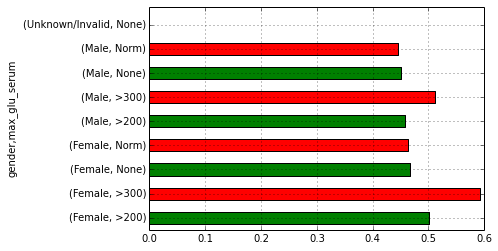

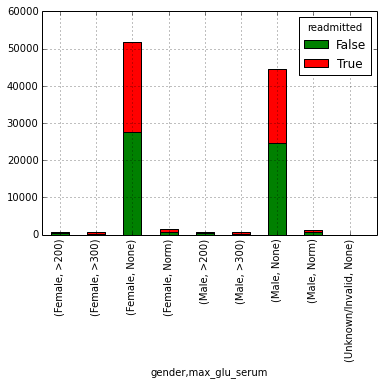

In [14]:
# print a bar chart of the people who were readmitted race and gender
df_serumGroup = copy.deepcopy(df)
#replace the 2's with 1's so that the sum works out
df_serumGroup.readmitted = df_serumGroup.readmitted.replace(to_replace=2,value=1)
df_serumGroup = df_serumGroup.groupby(by=['gender','max_glu_serum'])
readmission_rate = df_serumGroup.readmitted.sum() / df_serumGroup.readmitted.count()
readmission_rate.plot(kind='barh', stacked=True, color = ['green', 'red'])

readmission_counts = pd.crosstab([df['gender'],df['max_glu_serum']], df.readmitted.astype(bool))
readmission_counts.plot(kind='bar', stacked=True, color=['green','red'])


The above shows that for the glucose serum levels collected, those with levels above 300 were most likely to be rehospitalized.  Ladies with serum levels above 300 had an almost 60% chance of returning.  But those with normal levels had about the same chance of returning as those with no measurement at all.

However, the bottom chart illustrates that the data for serum levels are relatively sparse.  

### Interesting Features

The most interesting feature about the data was the counter-intuitive statistic that merely performing the A1C test slightly reduced the readmission rate (about 2%).  

The other interesting feature was that the Caucasian and African American statistics on readmission were very similar, at least among diabetic patients.  I had read that African Americans are more likely to have health problems than Caucasians, but this showed that, at least among diabetics, they were rehospitalized at the same rates after their initial hospital visit.

The fact that Asians are very noticeably healthier than the other ethnic group was also interesting.  My wife is Asian and diabetic.  Perhaps it is their diet?


### Other Features That Could Be Added

There are 45 more attributes in the data set that could be explored. 

I would be interested in revisiting it and using some of the data reduction techniques discussed in class to consolidate them and see how they affect the readmission rates.  For example, there were many medications that could be correlated against the readmission rate.  And the medical diagnosis codes could be grouped and quantified. Unfortunately I ran out of time on this assignment, and was unable to pursue it further.


### Exceptional work: 

I had to forego this section due to time constraints.  It took me about 22 hours to complete this, and it is 11:00 on Thursday night.  I expect that the next assignment will go better since I have a better understanding of the tools.

This plain text.

#Header
##Subheader

$x=5$
